In [1]:
from astropy.io import fits
import clevar
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
from clevar.match_metrics.distances import ClCatalogFuncs as d_cf
from clevar.match_metrics.scaling import ClCatalogFuncs as s_cf
import clevar.match_metrics.scaling as scaling

import pandas as pd
from astropy.table import Table
import astropy
from matplotlib import pyplot as plt
import numpy as np
from numcosmo_py import Ncm, Nc
from numcosmo_py.external.pyssc import pyssc as PySSC
Ncm.cfg_init()

In [2]:
hdul_halos = fits.open("../halos/halos.fits")
hdul_ame = fits.open("richness_mcut_SNR 12_ame.fits")

logMmin = 13
logMmax = 15

table_halos = hdul_halos[1].data
table_ame = hdul_ame[1].data
table_halos = table_halos[(table_halos['upid'] == -1)  &  (table_halos['Mvir'] >= 10**logMmin) & (table_halos['Mvir'] <= 10**logMmax)]
table_halos['Mvir'] = table_halos['Mvir']/0.6774

print(table_halos.size)
print(table_ame.size)

print(table_ame.columns)

689973
23751
ColDefs(
    name = 'ID'; format = 'I'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'z'; format = 'D'
    name = 'z_err'; format = 'D'
    name = 'SNR'; format = 'D'
    name = 'SNR_ORIG'; format = 'D'
    name = 'richness'; format = 'D'
    name = 'radius'; format = 'D'
    name = 'rank'; format = 'J'
    name = 'Rc'; format = 'D'
    name = 'R_ame'; format = 'D'
    name = 'R_ame_err'; format = 'D'
)


In [3]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_ame = clevar.ClCatalog('Detection catalog', ra=table_ame['RA'], dec=table_ame['DEC']
                             , z=table_ame['z'], mass=table_ame['R_ame']  , mass_err=table_ame['R_ame_err'] ,z_err=table_ame['z_err'] , )

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [13]:
mt = clevar.match.ProximityMatch()

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'redshift_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                },
    'catalog2': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                }
}

cosmo_astropy = clevar.cosmology.AstroPyCosmology()

mt.match_from_config(catalog_halos, catalog_ame, match_config, cosmo=cosmo_astropy)
mt.save_matches(catalog_halos, catalog_ame, out_dir='temp', overwrite=True)


## ClCatalog 1
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Halo catalog)
* 25,922/689,973 objects matched.

## Multiple match (catalog 2)
Finding candidates (Detection catalog)
* 22,285/23,751 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Halo catalog)
* 22,285/689,973 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Detection catalog)
* 22,285/23,751 objects matched.
Cross Matches (Halo catalog)
* 22,271/689,973 objects matched.
Cross Matches (Detection catalog)
* 22,271/23,751 objects matched.


In [4]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_ame = clevar.ClCatalog('Detection catalog', ra=table_ame['RA'], dec=table_ame['DEC']
                             , z=table_ame['z'], mass=table_ame['R_ame']  , mass_err=table_ame['R_ame_err'] ,z_err=table_ame['z_err'] , )
mt = clevar.match.ProximityMatch()
mt.load_matches(catalog_halos, catalog_ame, out_dir='temp')

halos_match, detections_match = clevar.match.get_matched_pairs(catalog_halos, catalog_ame, 'cross')

detections_match

Halo catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    689,973
 * multiple (self):  25,922
 * multiple (other): 25,922
 * unique (self):    22,285
 * unique (other):   22,285
 * cross:            22,271

Detection catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    23,751
 * multiple (self):  22,285
 * multiple (other): 22,285
 * unique (self):    22,285
 * unique (other):   22,285
 * cross:            22,271


id,ra,dec,z,mass,mass_err,z_err,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_cross
str5,float64,float64,float64,float64,float64,float64,object,object,object,object,object
3464,224.2628875340314,61.028825506020304,0.0683782529345174,37.0,2.2375820282915515,0.0083782529345174,199,199,['199'],['199'],199
19744,227.04884922802296,69.05066906371957,0.0696005956063757,18.0,2.295499922311768,0.0096005956063757,202,202,['202'],['202'],202
17390,202.47958752311607,54.66305059606346,0.046599787784135,35.0,2.9658536713735564,0.0034002122158649,239,239,['239'],['239'],239
23132,202.58196460014312,46.284557647634735,0.0498120565798088,30.0,1.7765613527261028,0.0001879434201912,244,244,['244'],['244'],244
15185,221.89038020129368,56.8139170066969,0.0656363405614508,16.0,2.519645477707793,0.0056363405614508,277,277,['277'],['277'],277
10943,226.75960791349084,57.106948607730274,0.0643793409888317,20.0,2.0696434475532253,0.0043793409888317,279,279,['279'],['279'],279
16490,213.94552455617048,35.437654347993934,0.0496535152727543,30.0,1.462264399256623,0.0003464847272456,295,295,['295'],['295'],295
9114,186.489213162117,40.69399416835533,0.0550640079846114,92.8,2.3004045093562717,0.0050640079846114,347,347,['347'],['347'],347
2331,200.90681812372296,48.98004167469734,0.0588801324279918,23.04,2.0514519346063174,0.0088801324279918,386,386,['386'],['386'],386


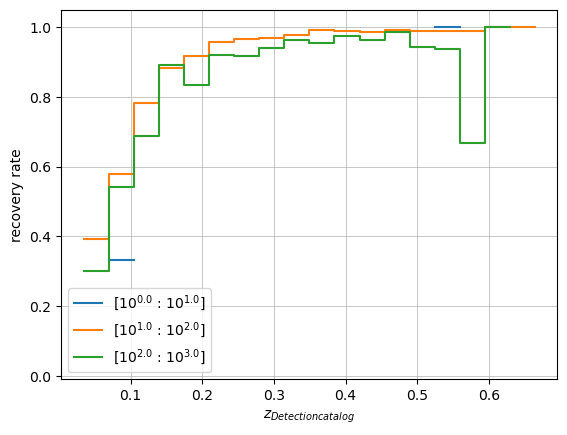

In [89]:
from clevar.match_metrics import recovery

zbins = np.linspace(0, 0.664, 20)
mbins = np.logspace(13.0-np.log10(0.667), 15-np.log10(0.667), 5)
rbins = np.logspace(0 , 3, 4cast/amico/
Name
Last Modified

cast/amico/
Name
Last Modified

)


info = recovery.plot(catalog_ame, 'cross', zbins, rbins, shape='steps')

plt.legend()
plt.savefig("recovery_detections.jpg")

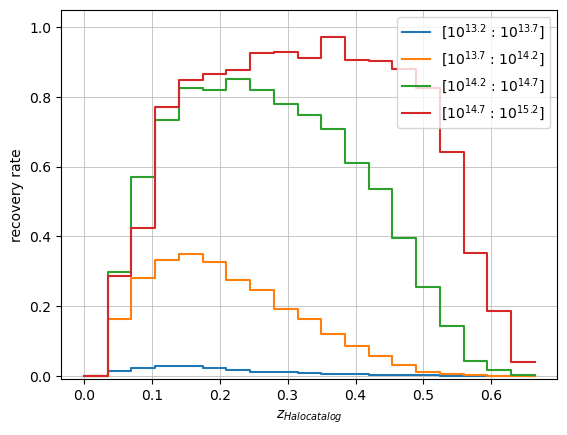

In [87]:
info = recovery.plot(catalog_halos, 'cross', zbins, mbins, shape='steps')
plt.legend()
plt.savefig("recovery_halos.jpg")